In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(style="darkgrid")


In [53]:
df = pd.read_csv("LoanStats3b.csv")
desc = pd.read_excel("LCDataDictionary.xlsx")

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (47,123,124,125,128,129,130,133) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [64]:
column_info("bc_util")

Ratio of total current balance to high credit/credit limit for all bankcard accounts.
values: [ 53.9  16.1  96.  ... 117.2 135.3 187.9]
length: 1195
max: 339.6


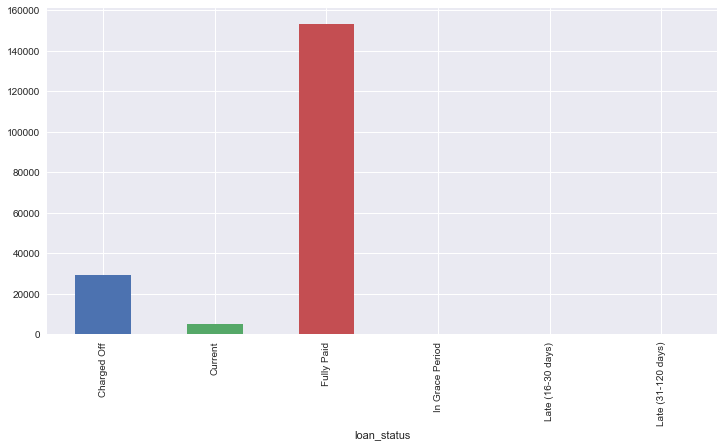

In [16]:
df.groupby('loan_status').size().plot(kind="bar", figsize=(12,6))
plt.savefig("loan_status_bar.png")

In [884]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [48]:
column_desc = {}
for column in df.columns:
    column_desc[column] = str(*desc[desc['LoanStatNew'] == column]['Description'].values)

In [479]:
column_desc

In [68]:
df['issue_month'], df['issue_year'] = df['issue_d'].str.split('-', 1).str

In [67]:
df['default'] = [1 if i == "Charged Off" else 0 for i in df['loan_status']]

In [69]:
# ----------------------
#       Cleaning
# ----------------------

df['int_rate'] = df['int_rate'].str.replace("%", "")
df['int_rate'] = df['int_rate'].astype("float")

# Not useful data
not_useful = ['url', 'desc', 'policy_code', 'last_pymnt_d',
              'next_pymnt_d', 'earliest_cr_line', 'emp_title',
              'id', 'member_id', 'title', 'total_rec_int',
              'total_rec_late_fee', 'total_rec_prncp', 'zip_code']

df = df.drop(not_useful, axis=1)

UnboundLocalError: local variable 'ax2' referenced before assignment

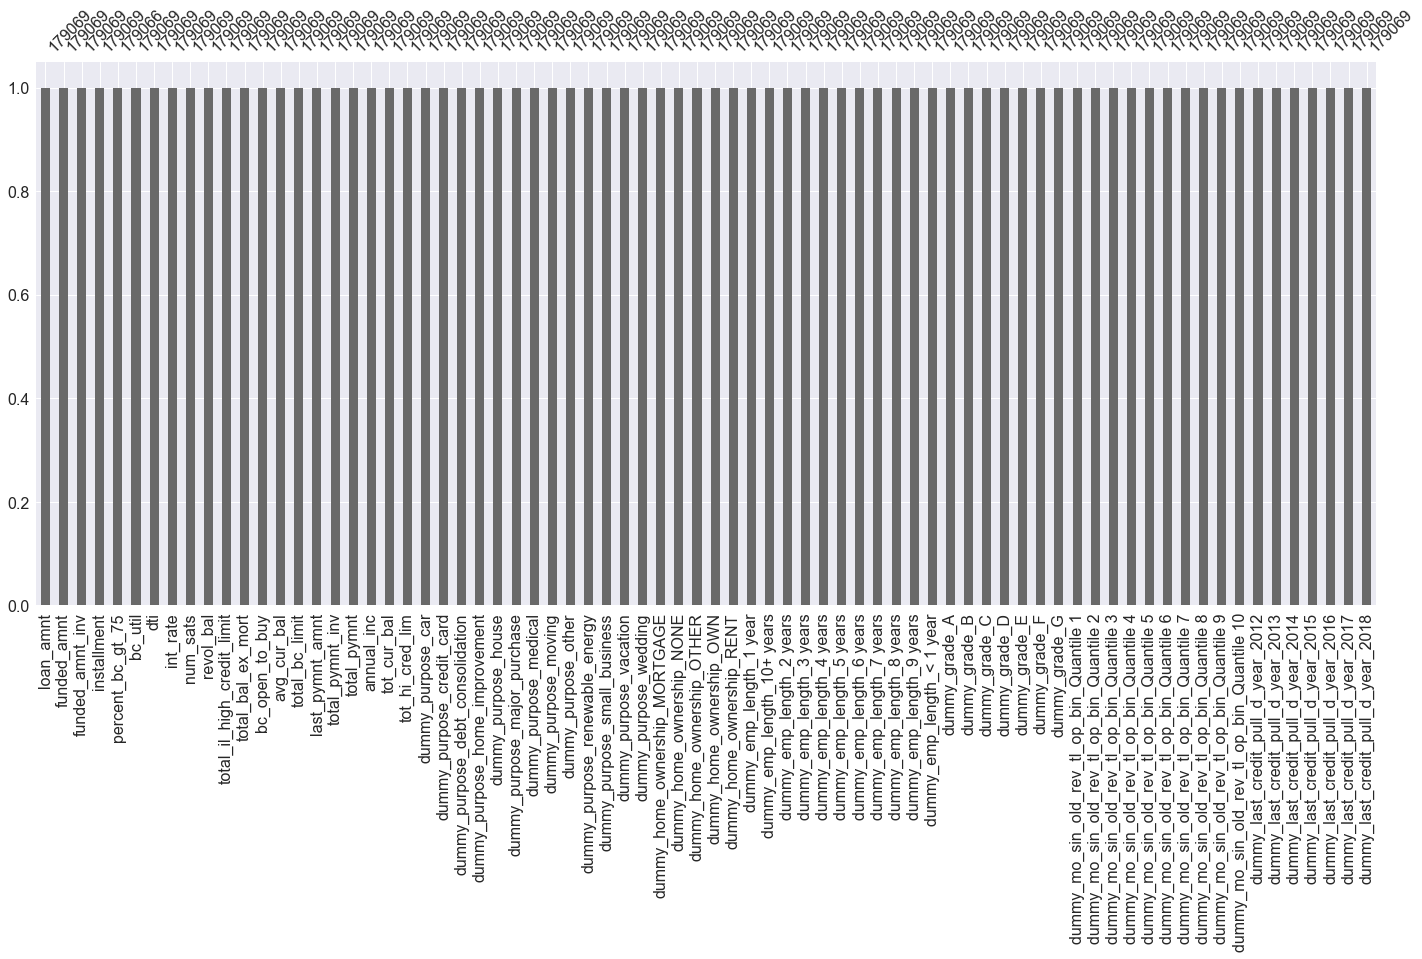

In [779]:
# ----------------------
#       Handle NA
# ----------------------

msno.bar(df[model_features])

In [9]:
df.dropna(subset=["bc_util"], inplace=True)

In [775]:
np.percentile(df['tot_hi_cred_lim'].dropna(axis=0), 10)

24758.0

In [72]:

# df['bc_util'].fillna(0, inplace=True)
# df['bc_util'].fillna(np.percentile(df['bc_util'].dropna(axis=0), 10), inplace=True)
# df['percent_bc_gt_75'].fillna(np.percentile(df['percent_bc_gt_75'].dropna(axis=0), 10), inplace=True)
df['bc_open_to_buy'].fillna(np.percentile(df['bc_open_to_buy'].dropna(axis=0), 10), inplace=True)
# df['total_bc_limit'].fillna(np.percentile(df['total_bc_limit'].dropna(axis=0), 10), inplace=True)
df['tot_hi_cred_lim'].fillna(np.percentile(df['tot_hi_cred_lim'].dropna(axis=0), 10), inplace=True)
df['num_sats'].fillna(0, inplace=True)
df['annual_inc'].fillna(np.median(df['annual_inc']), inplace=True)
df['avg_cur_bal'].fillna(np.median(df['avg_cur_bal'].dropna(axis=0)), inplace=True)
df['total_bal_ex_mort'].fillna(np.median(df['total_bal_ex_mort']), inplace=True)
df['tot_cur_bal'].fillna(np.median(df['tot_cur_bal'].dropna(axis=0)), inplace=True)

credit_limit_groupby_annual_inc = df.groupby('annual_inc_bin')['total_il_high_credit_limit'].transform('mean')
df['total_il_high_credit_limit'].fillna(credit_limit_groupby_annual_inc, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/lib/function_base.py:4033: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


In [71]:
# ----------------------
#       Binning
# ----------------------

df['bc_util_bin'] = pd.qcut(df['bc_util'], q=4, labels=["Quantile {}".format(i) for i in range(1,5)] , duplicates="drop")
df['installment_bin'] = pd.qcut(df['installment'], q=10, labels=["Quantile {}".format(i) for i in range(1,11)], duplicates="drop")
df['dti_bin'] = pd.qcut(df['dti'], q=10, labels=["Quantile {}".format(i) for i in range(1,11)], duplicates="drop")

df["bc_open_to_buy_bin"] = pd.qcut(df['bc_open_to_buy'], q=10, labels=["Quantile {}".format(i) for i in range(1,11)], duplicates="drop")
df["annual_inc_bin"] = pd.qcut(df['annual_inc'], q=10, labels=["Quantile {}".format(i) for i in range(1,11)], duplicates="drop")
df["mths_since_last_major_derog_bin"] = pd.qcut(df['mths_since_last_major_derog'], q=6, labels=["Quantile {}".format(i) for i in range(1,7)], duplicates="drop")
df["total_acc_bin"] = pd.qcut(df['total_acc'], q=6, labels=["Quantile {}".format(i) for i in range(1,7)], duplicates="drop")
df["revol_bal_bin"] = pd.qcut(df['revol_bal'], q=20, labels=["Quantile {}".format(i) for i in range(1,21)], duplicates="drop")
df["mo_sin_old_rev_tl_op_bin"] = pd.qcut(df['mo_sin_old_rev_tl_op'], q=10, labels=["Quantile {}".format(i) for i in range(1,11)], duplicates="drop")
df["num_il_tl_bin"] = pd.qcut(df["num_il_tl"], q=6, labels=["Quantile {}".format(i) for i in range(1,7)], duplicates="drop")
df["loan_amnt_bin"] = pd.qcut(df['loan_amnt'], q=10, labels=["Quantile {}".format(i) for i in range(1,11)], duplicates="drop")



In [124]:
column_info('revol_bal')

Total credit revolving balance
values: [36638  4136  5759 ... 29371 15390 53282]
length: 43591
max: 2568995


# Exploratory Data Analysis

In [73]:
nan_columns = []
for col in numerical.columns:
    col_vals = df[col].unique()
    if len(col_vals) == 1:
        if np.isnan(col_vals[0]):
            nan_columns.append(col)

In [424]:
set(numerical.columns).difference(set(nan_columns))

{'acc_now_delinq',
 'acc_open_past_24mths',
 'annual_inc',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'bc_util_bin',
 'chargeoff_within_12_mths',
 'collection_recovery_fee',
 'collections_12_mths_ex_med',
 'default',
 'deferral_term',
 'delinq_2yrs',
 'delinq_amnt',
 'dti',
 'funded_amnt',
 'funded_amnt_inv',
 'hardship_amount',
 'hardship_dpd',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_payoff_balance_amount',
 'inq_last_6mths',
 'installment',
 'installment_bin',
 'int_rate',
 'last_pymnt_amnt',
 'loan_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num

In [74]:
def column_info(col):
    print(column_desc[col])
    try:
        vals = (df[col].unique(), len(df[col].unique()), max(df[col].unique()))
    except:
        vals = (df[col].unique(), len(df[col].unique()), None)
    print("values: {}\nlength: {}\nmax: {}".format(*vals))

In [83]:
df['grade_numerical'] = numerical['grade']

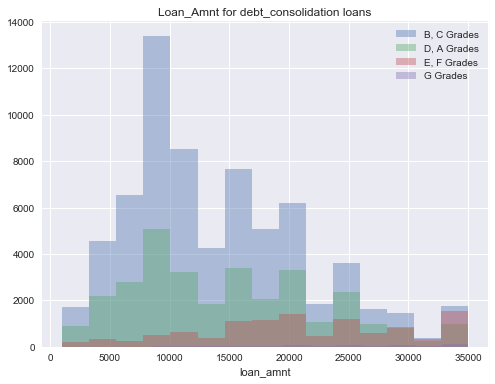

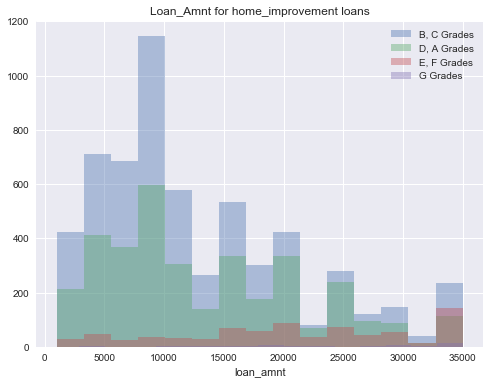

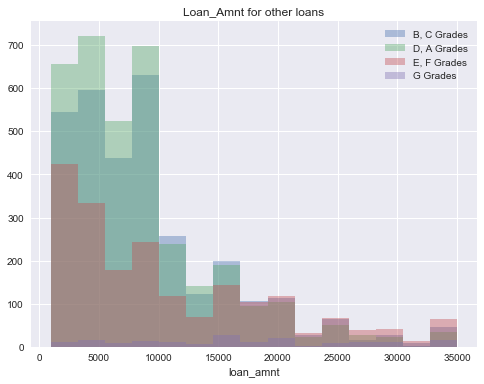

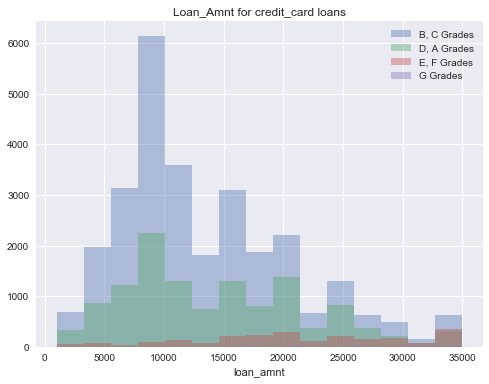

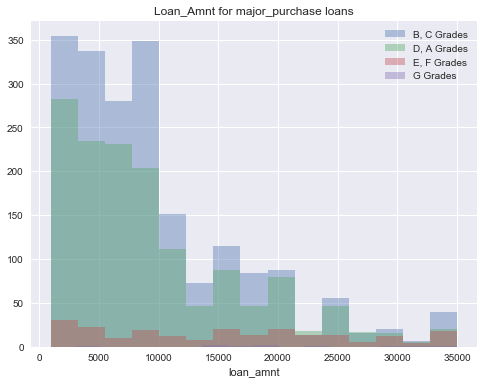

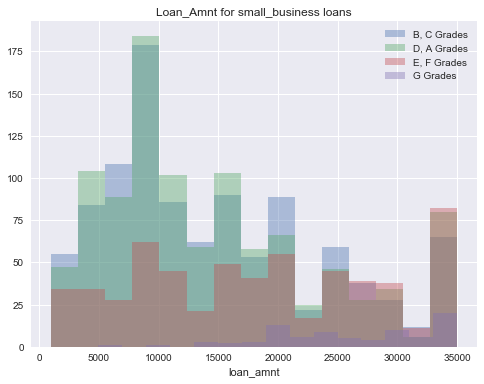

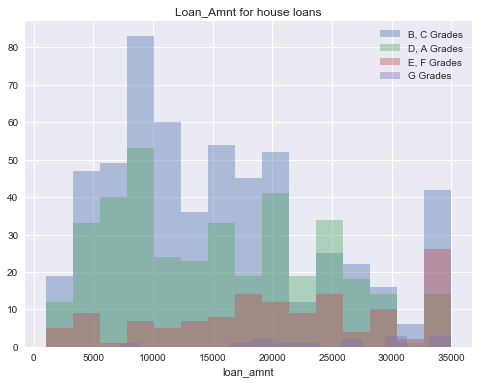

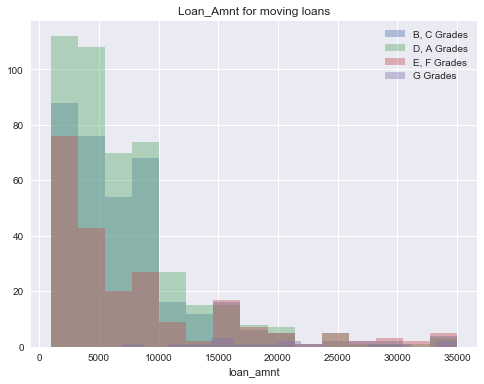

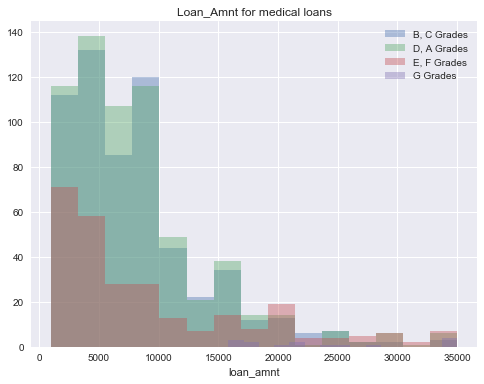

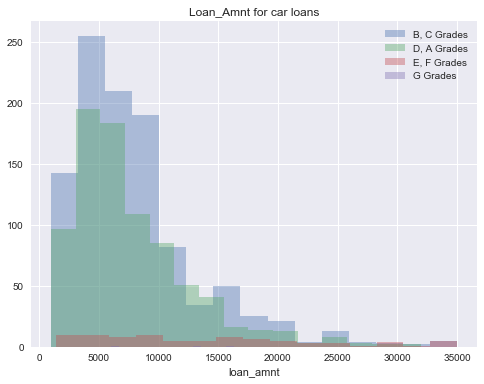

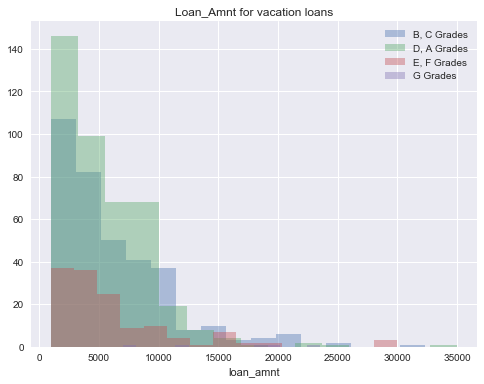

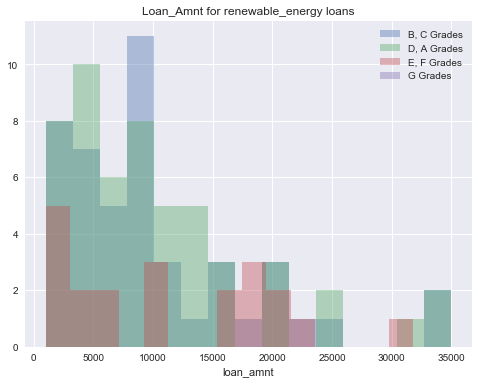

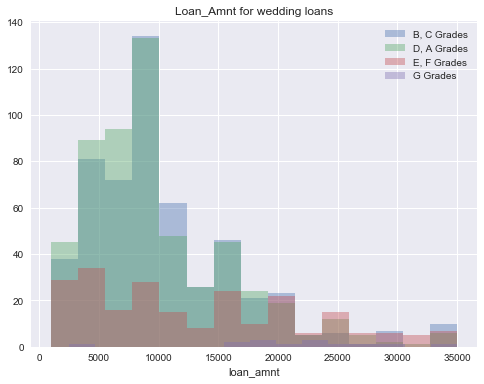

In [99]:
grades = df['grade'].unique()
n = 2
grades_grouped = [grades[i:i+n] for i in range(0, len(grades), n)] 

def run_hist(input_df, col, bins, to_iterate, col_val, save=False, outliers=False, outlier_percentile=70):
    fig, ax = plt.subplots(figsize=(8,6))
    if outliers:
        df_hist_orig = input_df[input_df[col] < np.percentile(input_df[col].dropna(), outlier_percentile)]
    else:
        df_hist_orig = input_df
    for grade in grades_grouped:
        df_hist = df_hist_orig
        try:
            df_hist = df_hist[df_hist['grade'].isin(grade)][col].dropna()
        except Exception as e:
            print(e)    
        g = sns.distplot(df_hist, bins=bins, ax=ax, kde=False, label=", ".join(grade) + " Grades")

        ax.set_title("{} for {} loans".format(df[col].name.title(), col_val))
        ax.legend()

    if save:
        plt.savefig("histogram_grades_{}_{}_{}.png".format(col, to_iterate, col_val))

def iterate_hist_over_col_vals(to_iterate, column):
    for col_val in df[to_iterate].unique():
        input_df = df[df[to_iterate] == col_val]
        run_hist(input_df, column, bins=15, to_iterate=to_iterate, col_val=col_val, outliers=False, save=True)

iterate_hist_over_col_vals(to_iterate="purpose", column="loan_amnt") 




In [759]:
grades_group = {'A': 1, 'B':1,
                'C': 2, 'D':2,
                'E': 3, 'F':3, 'G':3}
df["grades_grouped"] = df['grade'].map(grades_group)

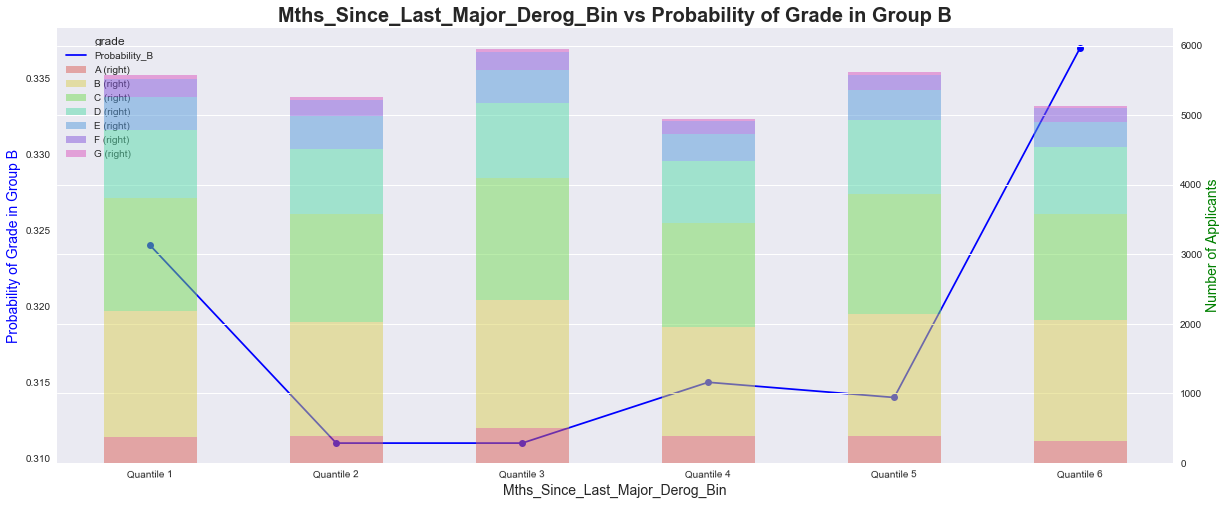

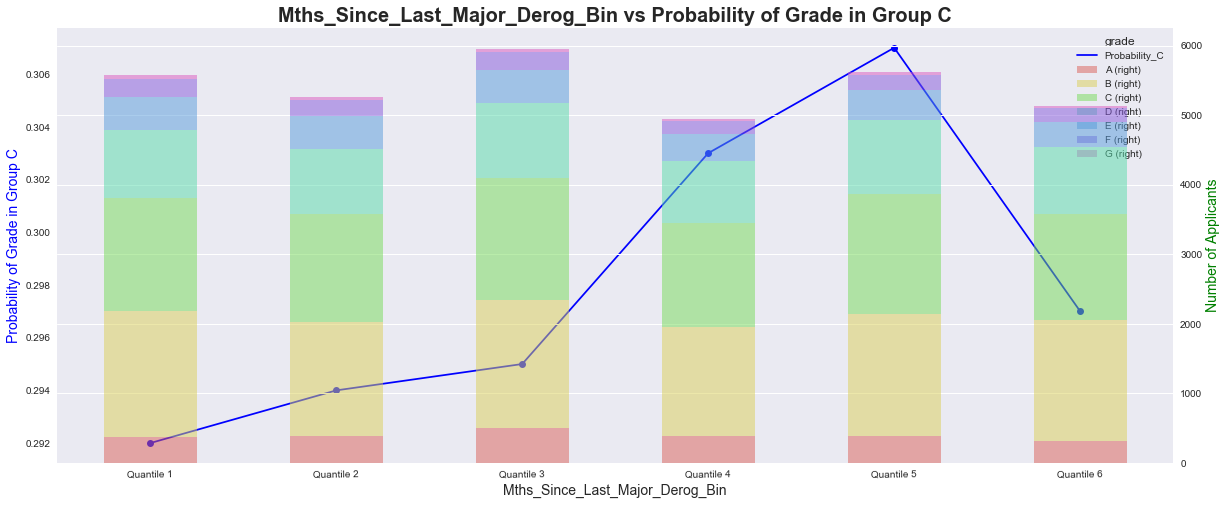

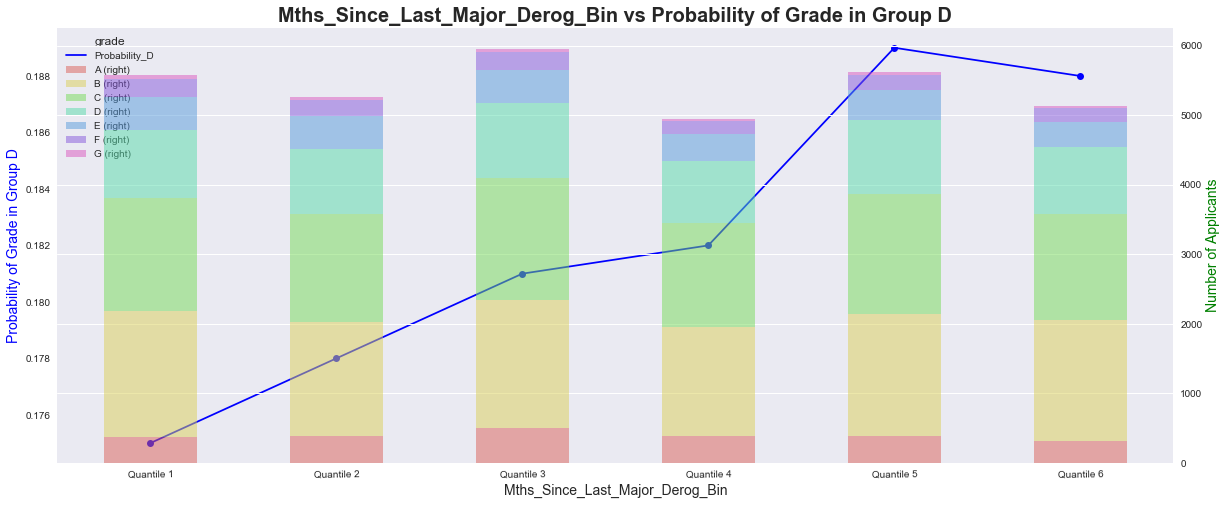

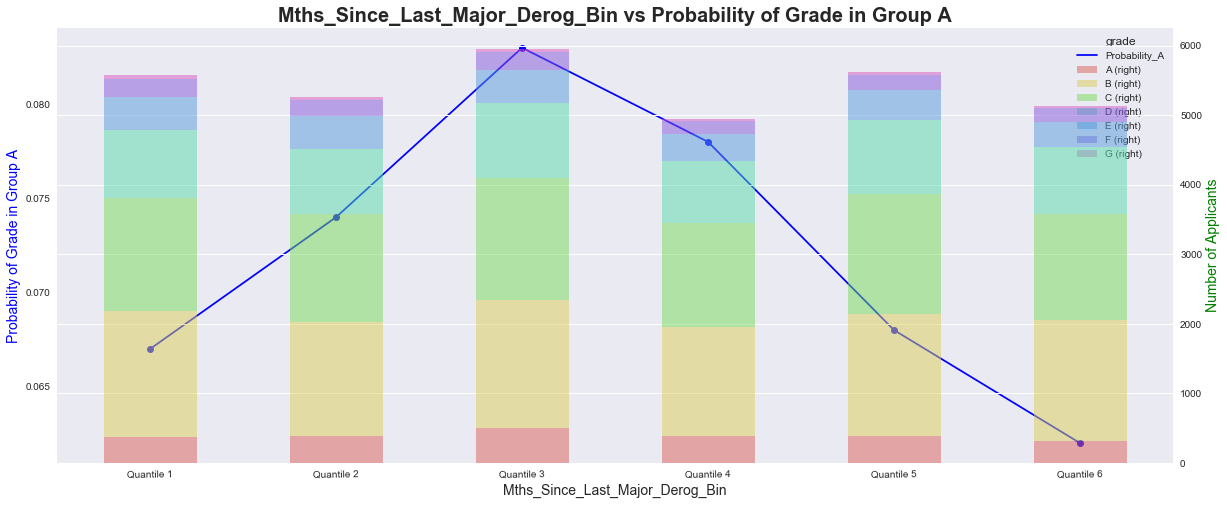

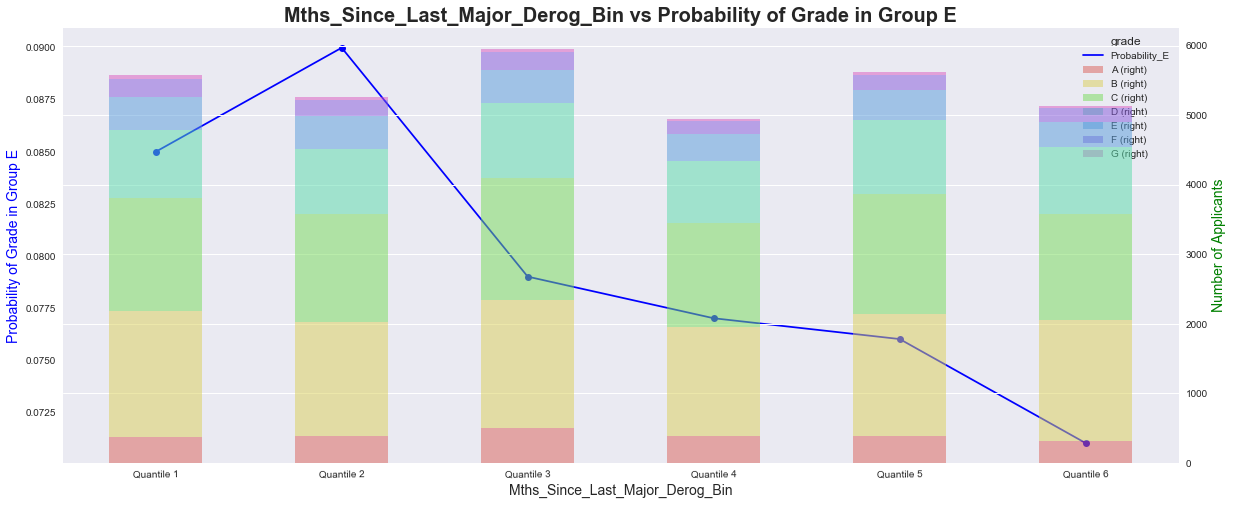

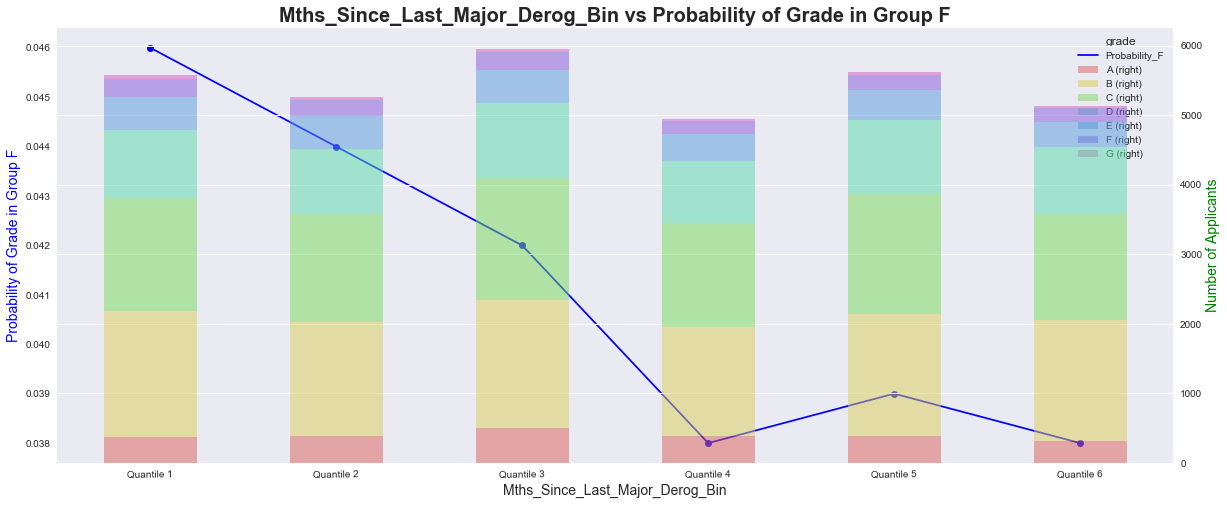

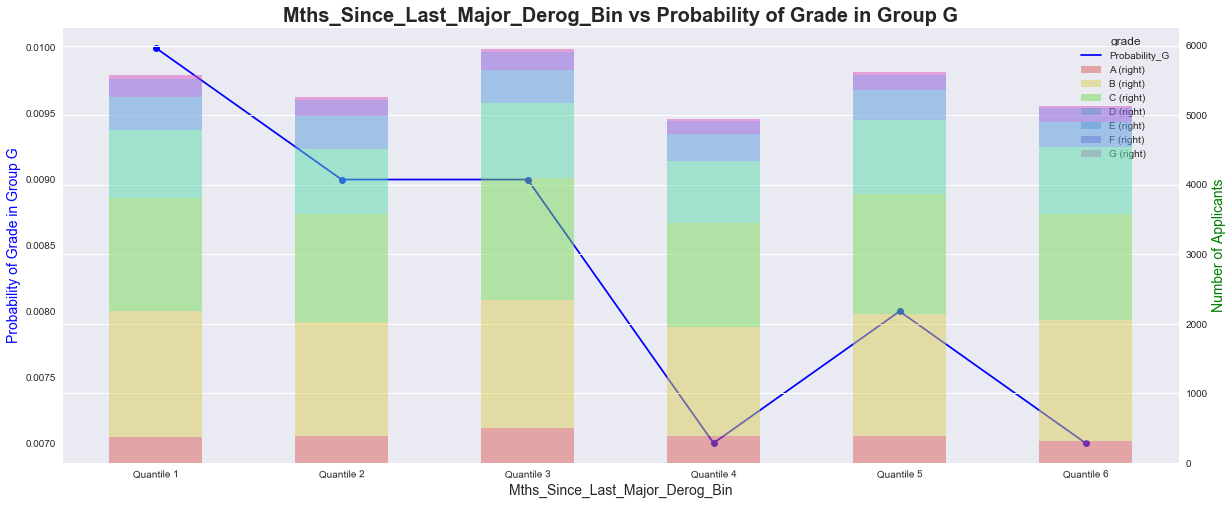

In [120]:
grades = sorted(df['grade'].unique())
rainbow = sns.color_palette("hls", 7)

def run_probabilities(col, grade):
    grade_ctab = pd.crosstab(df[col], df['grade'], margins=True)
    grade_ctab['Probability_{}'.format(grade)] = round((grade_ctab[grade]/grade_ctab['All']),3)
    return grade_ctab[0:-1]


def run_graph(ctab, col, grade, stacked= True, alpha=1.0, save=False):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    grade_title = 'Probability of Grade in Group {}'.format(grade)
    # get dataframe from crosstab function
    plotCrosstab = ctab
    
    linePlot = plotCrosstab[["Probability_{}".format(grade)]]      
    barPlot =  plotCrosstab.iloc[:,0:-2]
    ax = linePlot.plot(figsize=(20,8), marker='o', color='b')
    ax2 = barPlot.plot(kind="bar", ax=ax, rot=1, secondary_y=True, stacked=stacked, color=rainbow, alpha=alpha)
    ax.set_title(df[col].name.title() + ' vs ' + grade_title, fontsize=20, weight="bold")
    ax.set_xlabel(df[col].name.title(), fontsize=14)
    ax.set_ylabel(grade_title, color = 'b', fontsize=14)
    ax2.set_ylabel('Number of Applicants', color = 'g', fontsize=14)
    if save:
        plt.savefig(col + "_" + grade + ".png")
    plt.show()
    return linePlot
    
def display_probability_graph(col, grade, alpha=1.0, save=False):
    ctab = run_probabilities(col, grade)
#     display(ctab[col].tail(20))
    return run_graph(ctab, col, grade, alpha=alpha, save=save)


for grade in df['grade'].unique():
    display_probability_graph("mths_since_last_major_derog_bin", grade, alpha=0.5, save=False)

#     linePlot = display_probability_graph("annual_inc_bin", grade, alpha=0.5)
#     linePlot.plot(figsize=(20,8), marker='o', color='b', ax=ax.twinx())


    

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


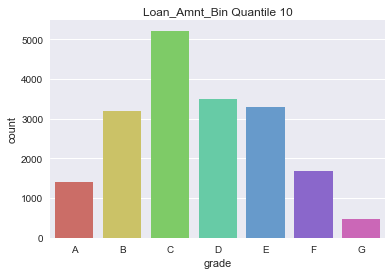

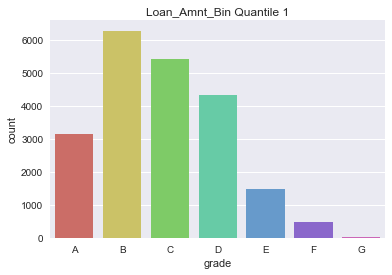

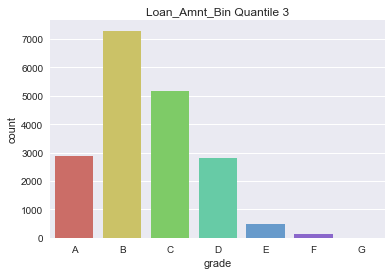

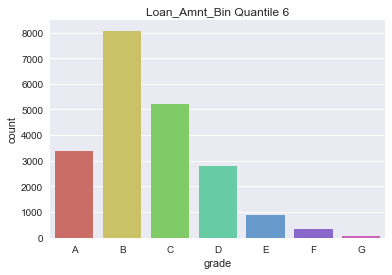

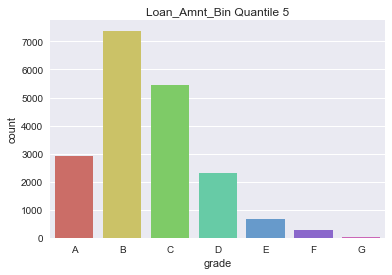

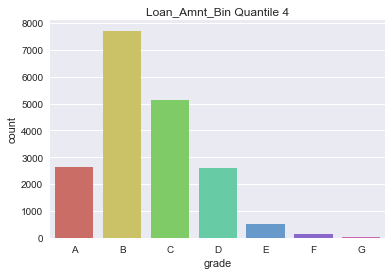

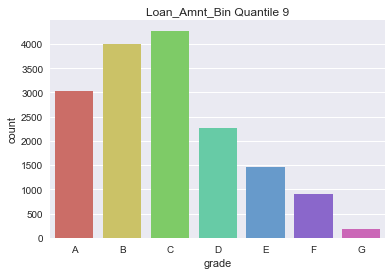

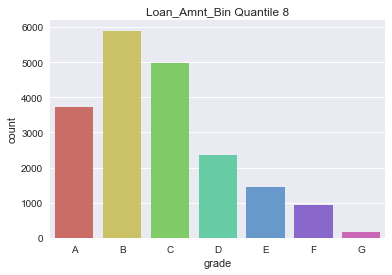

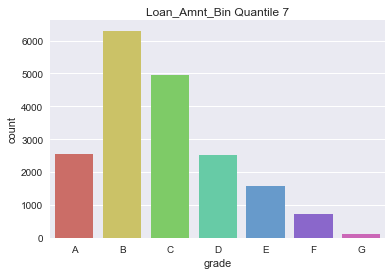

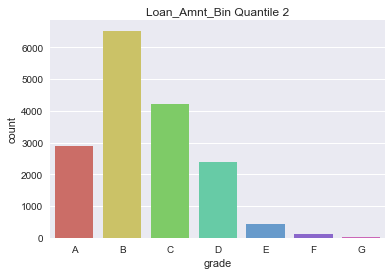

In [93]:
#    sns.countplot(x="grade", data=df[df['purpose'] == "car"]);
def run_countplot(x, col, val, save=False):
    g = sns.countplot(x=x, data=df[df[col] == val].sort_values(x), palette=rainbow)
    g.set_title(df[col].name.title() + " " + val)
    if save:
        plt.savefig(f"countplot_{x}_{col}_{val}.png")
    plt.show()
    
for val in df['loan_amnt_bin'].unique():
    run_countplot("grade", "loan_amnt_bin", val, save=True)

In [126]:
column_info("bc_util")

Ratio of total current balance to high credit/credit limit for all bankcard accounts.
values: [ 53.9  16.1  96.  ... 117.2 135.3 187.9]
length: 1195
max: 339.6


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/categorical.py:490: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


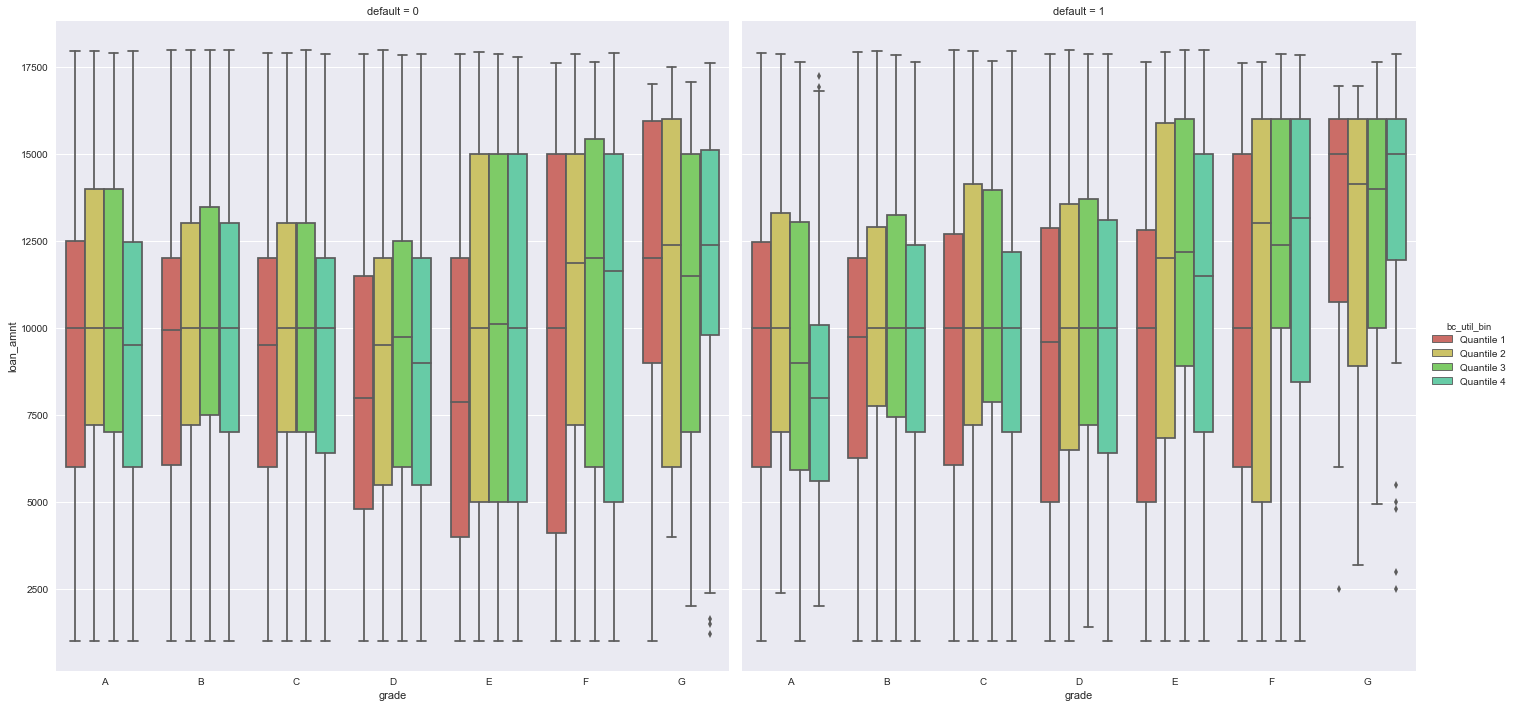

In [141]:
# sns.boxplot(x="grade", y="loan_amnt", data=df)
#     plt.savefig("factorplot_grade_avg_cur_bal_purpose.png")
#     sns.factorplot(x="grade", y="bc_util", hue="default",
#                    col="home_ownership", data=df.sort_values("grade"), kind="box", size=10, aspect=1, palette=rainbow)

def run_factorplot(input_df, x, y, col, hue="default", outliers=False, outlier_percentile=70, save=False):
    if outliers:
        graph_df = input_df[input_df[y] < np.percentile(input_df[y].dropna(), outlier_percentile)]
    sns.factorplot(x=x, y=y, hue=hue, col=col, data=graph_df.sort_values(x),
                   kind="box", size=10, aspect=1, palette=rainbow)
    if save:
        plt.savefig(f"factorplot_{x}_{y}_{col}.png")
    plt.show()

run_factorplot(input_df=df, x="grade", y="loan_amnt", col="default", hue="bc_util_bin", outliers=True, save=True)



In [142]:
column_info('dti')

A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
values: [22.87  2.49  8.4  ...  0.23  0.05  0.04]
length: 3499
max: 34.99


In [101]:
ctabs = {}

def do_crosstab(col):
    ctab = pd.crosstab(df[col], df['loan_status'],margins=True)
    ctab['Probability_Charged Off'] = round((ctab['Charged Off']/ctab['All']),3)
    ctab = ctab[0:-1]

    return ctab

# Probability of charge off
def bivariate_prob(col, stacked= True, save=False):
    '''
    df      : Dataframe
    col     : Column Name
    stacked : True(default) for Stacked Bar
    '''
    # get dataframe from crosstab function
    plotCrosstab = ctabs[col]
    
    linePlot = plotCrosstab[['Probability_Charged Off']]      
    barPlot =  plotCrosstab.iloc[:,0:-2]
    ax = linePlot.plot(figsize=(20,8), marker='o',color = 'b')
    ax2 = barPlot.plot(kind='bar',ax = ax,rot=1,secondary_y=True,stacked=stacked, alpha=0.5)
    ax.set_title(df[col].name.title() + ' vs Probability Charge Off', fontsize=20, weight="bold")
    ax.set_xlabel(df[col].name.title(), fontsize=14)
    ax.set_ylabel('Probability of Charged off',color = 'b', fontsize=14)
    ax2.set_ylabel('Number of Applicants',color = 'g', fontsize=14)
    if save:
        plt.savefig("bivariate_prob_of_default_" + col + ".png")
    plt.show()

def display_bivariate_prob(col, save=False):
    ctabs[col] = do_crosstab(col)
    display(ctabs[col].tail(20))
    return bivariate_prob(col=col, save=save)

In [ ]:
df['issue_d']

loan_status,Charged Off,Current,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All,Probability_Charged Off
issue_d,,,,,,,,
Dec-2012,916,0,5150,0,0,0,6066,0.151
Dec-2013,2238,847,11883,24,6,22,15020,0.149
Feb-2012,421,0,2139,0,0,0,2560,0.164
Feb-2013,1157,1,6399,0,0,4,7561,0.153
Jan-2012,440,0,2162,0,0,0,2602,0.169
Jan-2013,1050,0,5822,0,0,0,6872,0.153
Jul-2012,819,0,3808,0,0,0,4627,0.177
Jul-2013,1834,511,9540,15,1,9,11910,0.154
Jun-2012,714,0,3103,0,0,0,3817,0.187


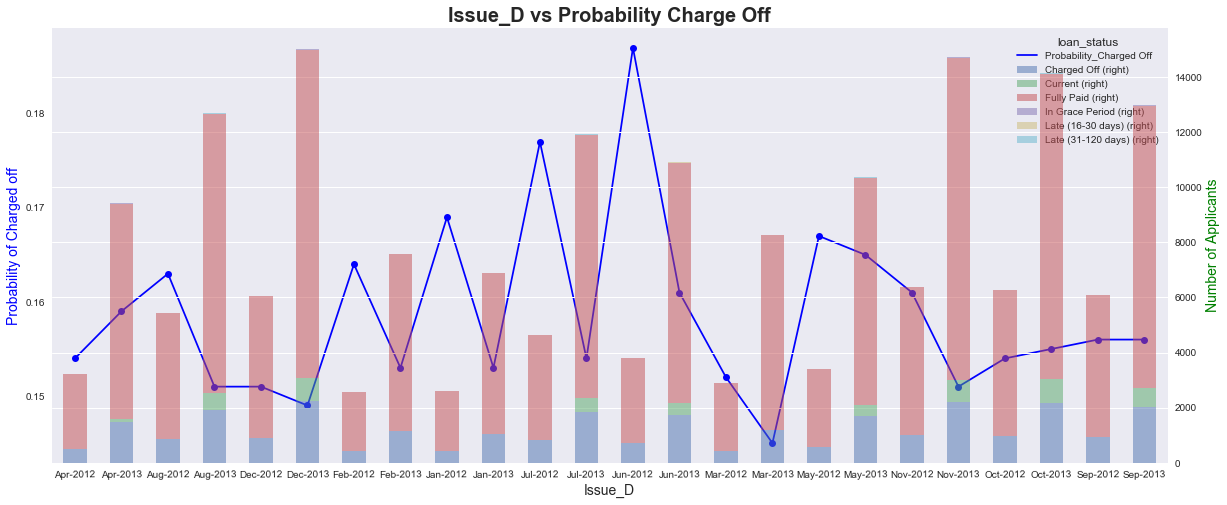

In [171]:
display_bivariate_prob("issue_d", save=True)

In [15]:
categorical = df.select_dtypes(object)
numerical = df.select_dtypes(include = ["float64", "int64"])
categorical['default'] = numerical['default'].astype(object)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
numerical['grade'] = df.sort_values('grade')['grade'].astype("category").cat.codes
numerical_corr = numerical.corr()
numerical_corr.dropna(how="all", inplace=True)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
import numpy as np
from operator import itemgetter

def run_correlation_matrix(target, save_as_dict=False):

    n_target_corr = dict(numerical_corr[target])
    median_of_n_target_corr = np.median(list(n_target_corr.values()))       
    filtered_target_corr_columns = {k: v for k, v in n_target_corr.items() if abs(v) > median_of_n_target_corr}
    sorted_ = sorted(filtered_target_corr_columns.items(), key=itemgetter(1), reverse=True)
    if save_as_dict:
        return sorted_
    else:
        zlist = list(zip(*sorted_))
        return pd.Series(zlist[1], index = zlist[0])

In [44]:
keys = [item[0] for item in run_correlation_matrix("grade", save_as_dict=True)]

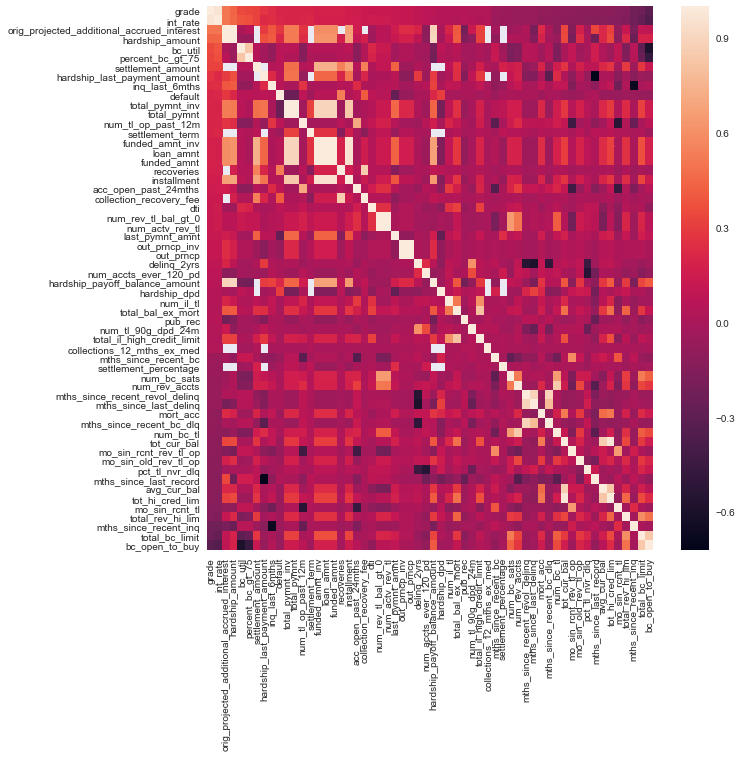

In [26]:
corr_graph = numerical[keys].corr()

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr_graph, 
        xticklabels=corr_graph.columns,
        yticklabels=corr_graph.columns, ax=ax)
plt.savefig("numerical_corr_graph_grade_sorted.png")

In [47]:
column_info("num_tl_op_past_12ml")

TypeError: 'dict' object is not callable

In [104]:
run_correlation_matrix("default")

default                                       1.000000
recoveries                                    0.531877
collection_recovery_fee                       0.407044
hardship_dpd                                  0.306338
orig_projected_additional_accrued_interest    0.280458
hardship_payoff_balance_amount                0.220077
hardship_amount                               0.216613
int_rate                                      0.209108
grade                                         0.204610
acc_open_past_24mths                          0.083342
dti                                           0.080899
num_tl_op_past_12m                            0.078161
hardship_last_payment_amount                  0.076176
percent_bc_gt_75                              0.066919
bc_util                                       0.064703
inq_last_6mths                                0.060126
num_rev_tl_bal_gt_0                           0.058030
num_actv_rev_tl                               0.057417
settlement

In [105]:
df['last_credit_pull_d_year'], df['last_credit_pull_d_year'] = df['last_credit_pull_d'].str.split("-", 1).str

In [106]:
categorical.columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'addr_state', 'revol_util', 'initial_list_status',
       'last_credit_pull_d', 'application_type', 'hardship_flag',
       'hardship_type', 'hardship_reason', 'hardship_status',
       'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date',
       'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'issue_month', 'issue_year', 'default'],
      dtype='object')

# Feature Engineering for Classification

In [143]:
to_dummies = [
        "purpose",
        "home_ownership",
        "emp_length",
        "grade",
        "mo_sin_old_rev_tl_op_bin",
        "last_credit_pull_d_year",
        "term"
]

def merge_dummies(dummies, df):
    for column in dummies:
        df = df.merge(pd.get_dummies(df[column], prefix="dummy_" + column), left_index=True, right_index=True)
    return df

In [144]:
df = merge_dummies(to_dummies, df)

In [150]:
column_desc['settlement_status']

'The status of the borrower’s settlement plan. Possible values are: COMPLETE, ACTIVE, BROKEN, CANCELLED, DENIED, DRAFT'

In [146]:
dummy_columns = [col for col in df.columns if "dummy" in col]

In [147]:
model_features = [
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "installment",
    "percent_bc_gt_75",
    "bc_util",
    "dti",
    "int_rate",
    "num_sats",
    "revol_bal",
    "total_il_high_credit_limit",
    "total_bal_ex_mort",
    "bc_open_to_buy",
    "avg_cur_bal",
    "total_bc_limit",
    "last_pymnt_amnt",
    "total_pymnt_inv",
    "total_pymnt",
    "annual_inc",
    "tot_cur_bal",
    "tot_hi_cred_lim",
]

model_features.extend(dummy_columns)

In [157]:
df[['loan_amnt','bc_util','grade', 'default']].head()

,loan_amnt,bc_util,grade,default
0,27050,53.9,B,0
1,4800,16.1,B,0
2,7550,96.0,C,0
3,27600,74.7,D,1
4,8000,72.5,B,1


In [148]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

X = df[model_features]#.drop(dummy_grade_columns, axis=1)
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
dummy_grade_columns = [col for col in df.columns if 'dummy_grade' in col]

In [164]:
logreg = LogisticRegression()
# logistic.fit(X_train, y_train)

In [165]:
# Prediction
C_param_range = [0.001,0.01,0.1,1,10,100]


# Parameters of pipelines can be set using ‘__’ separated parameter names:
estimator = GridSearchCV(logreg, param_grid={"C": np.linspace(0.001, 1, 10)})

In [166]:
estimator.fit(X_train.fillna(0), y_train.fillna(0))

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [169]:
y_pred = estimator.predict(X_test.fillna(0))

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99     39588
          1       0.98      0.86      0.92      7458

avg / total       0.98      0.98      0.98     47046



In [168]:
estimator.score(X_test.fillna(0), y_test.fillna(0))

0.9759596990179824

In [160]:
y_test_df = pd.DataFrame(y_test)
len(y_test_df[y_test_df['default'] == 0]), len(y_test_df[y_test_df['default'] == 1])

(39588, 7458)

In [162]:
len(y_test_df[y_test_df['default'] == 0]) + len(y_test_df[y_test_df['default'] == 1])

47046

In [163]:
len(y_pred)

NameError: name 'y_pred' is not defined